In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import time
import objective_functions.ridge_logistic as r

from tqdm import tqdm
from algorithms.gradient_descent import *
from algorithms.nesterov_gradient_descent import *
from algorithms.newton import *
from algorithms.sub_sampled_newton import *
from algorithms.nesterov_sub_sampled_newton import *
from read_data import *
from plots_and_weights.optimality_gaps import *
from plots_and_weights.plot_graph import *

In [2]:
# https://www.causality.inf.ethz.ch/data/SIDO.html
mat = scipy.io.loadmat('datasets/sido0_matlab/sido0_train.mat')

targets = []
with open('datasets/sido0_matlab/sido0_train.targets', 'r') as file:
    for line in file:
        targets.append(line.strip())      
targets = [int(t) for t in targets]

In [3]:
A = np.array(mat['X'].toarray())
b = np.array(targets)

In [4]:
n, d = A.shape 
A = np.hstack((np.ones((n, 1)), A)) 
d = d + 1  
sum_of_squares = (A**2).sum(axis=0)

# print(np.count_nonzero(sum_of_squares == 0))
sum_of_squares[sum_of_squares == 0] = 1

normalization_factor = np.sqrt(sum_of_squares)

A /= normalization_factor

In [5]:
n, d = A.shape
rl = r.Ridge_Logistic_Regression(5)
st = 50 # stop time
sss = [int(0.01 * n), int(0.05 * n), int(0.1 * n)]  # sampling size
# sss = [int(0.05 * n), int(0.1 * n)]
lambd = 5
alpha = 1

# w, t = newton(A, b, np.zeros(d), rl, lambd, 1, 150, True)
# w_stars = w[len(t)-1]

In [6]:
# np.save('w_stars_sido0.npy', w_stars)
w_stars = np.load('w_stars_sido0.npy')

In [7]:
w0, t0 = newton(A, b, np.zeros(d), rl, lambd, alpha, st, False)
w2, t2 = gd(A, b, np.zeros(d), rl, lambd, 0.05, st)
w3, t3 = nesterov_gd(A, b, np.zeros(d), rl, lambd, 0.05, -1, st)

Newton computation time: 55.29583525657654
GD computation time: 50.02493596076965
Nesterov GD computation time: 50.05986189842224


Sub-sampled Newton rnss computation time: 51.498862981796265
Nesterov Sub-sampled Newton rnss computation time: 50.132041931152344
Sub-sampled Newton rnss computation time: 50.37813687324524
Nesterov Sub-sampled Newton rnss computation time: 50.01026105880737
Sub-sampled Newton rnss computation time: 50.70375323295593
Nesterov Sub-sampled Newton rnss computation time: 51.54892611503601


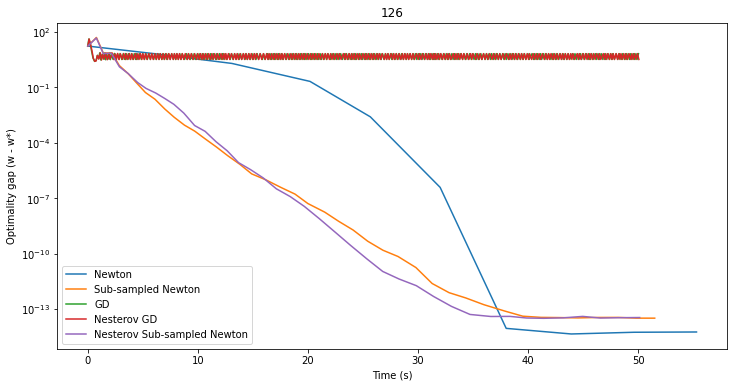

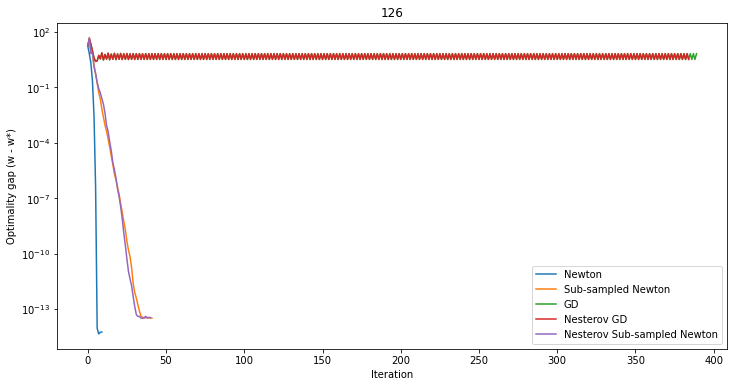

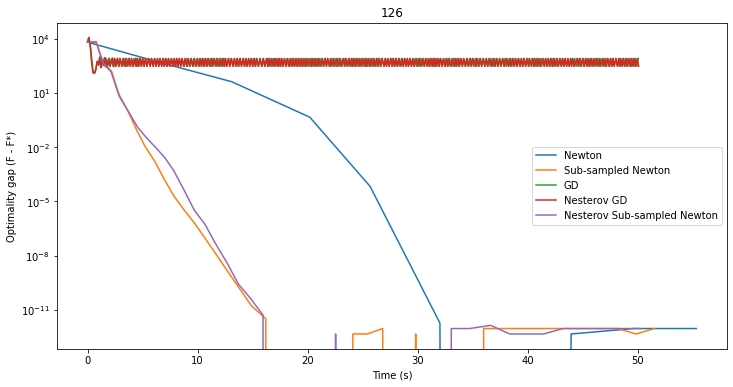

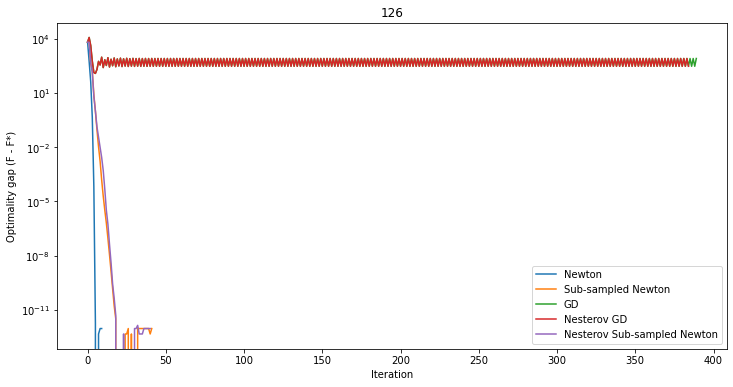

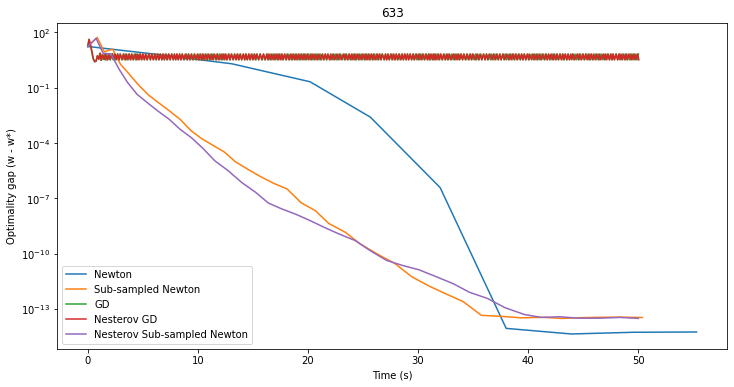

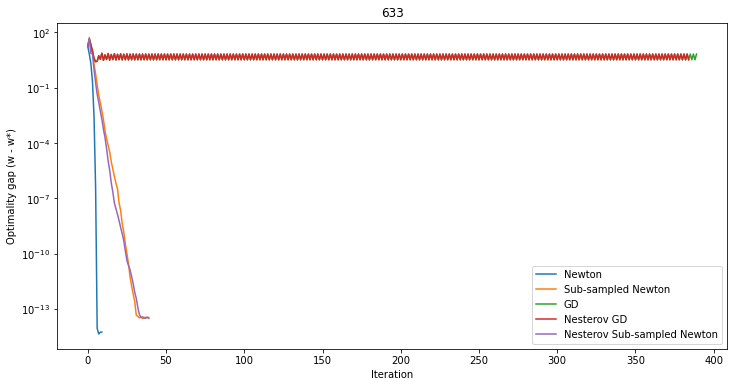

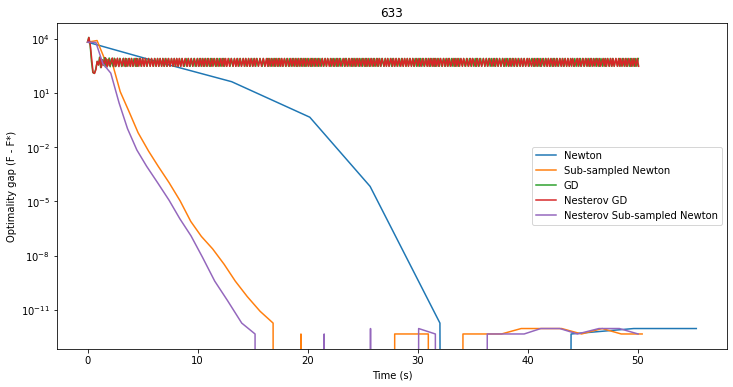

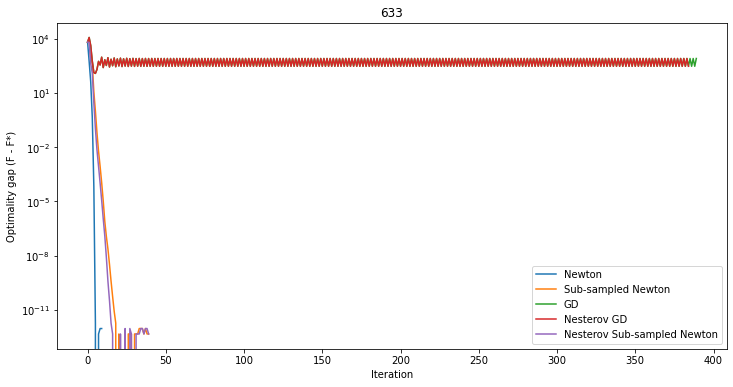

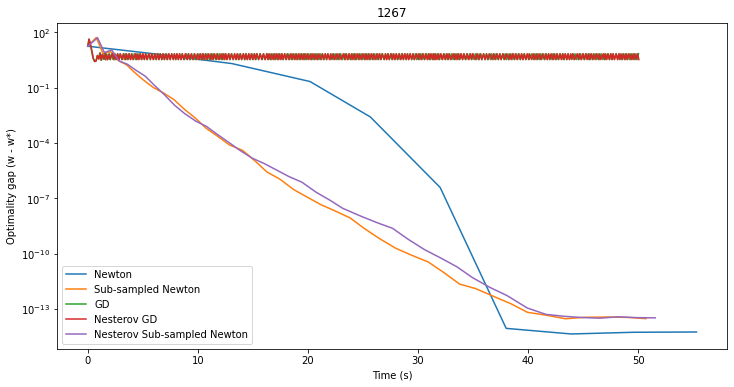

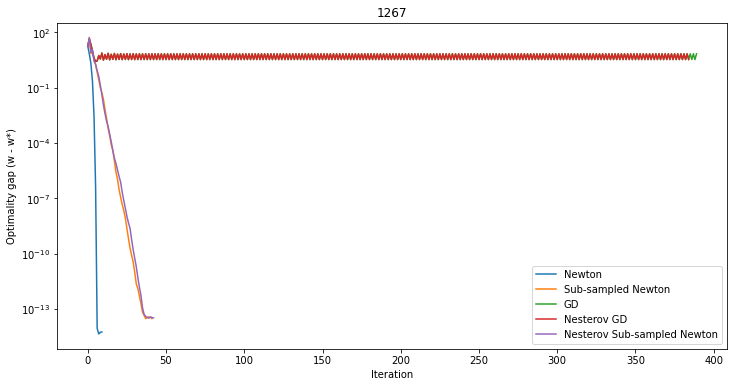

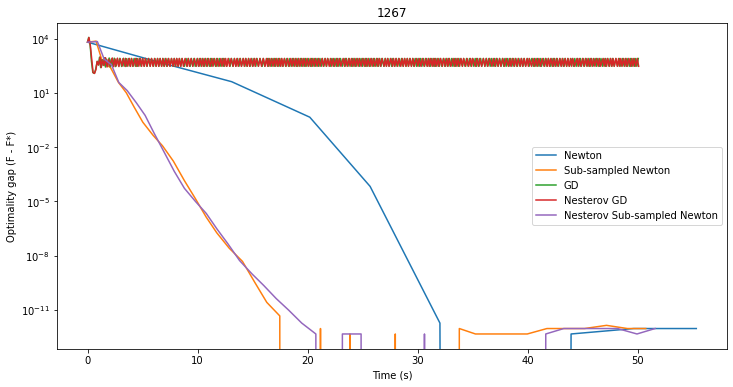

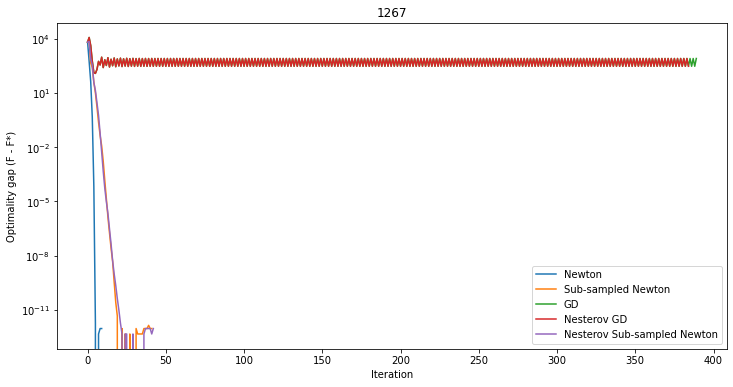

In [8]:
for ss in sss:
    w1, t1 = sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, alpha, st, sss[0])
#     w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, alpha, 0.14, st, sss[0])
    w4, t4 = nesterov_sub_sampled_newton_rnss(A, b, np.zeros(d), rl, lambd, alpha, -1, st, sss[0])
    ws = [w0,w1,w2,w3,w4]
    ts = [t0,t1,t2,t3,t4]
#     ws = [[],w1,[],[],w4]
#     ts = [[],t1,[],[],t4]
#     ws = [w0,[],w2,w3,[]]
#     ts = [t0,[],t2,t3,[]]
    ts_iters = [np.arange(len(t)) for t in ts]
    
    w_gaps = compute_w_gaps(ws, ts, w_stars)
    plot_graph(ts, w_gaps, 'Time (s)', 'Optimality gap (w - w*)', str(ss))
    plot_graph(ts_iters, w_gaps, 'Iteration', 'Optimality gap (w - w*)', str(ss))
    
    
    f_gaps = compute_f_gaps(A, b, ws, ts, w_stars, rl)
    plot_graph(ts, f_gaps, 'Time (s)', 'Optimality gap (F - F*)', str(ss))
    plot_graph(ts_iters, f_gaps, 'Iteration', 'Optimality gap (F - F*)', str(ss))

In [9]:
# lambdas = [0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
# cns = []
# for l in lambdas:
#     cn = r.Ridge_Logistic_Regression(l).condition_num(A, b, np.zeros(d))
#     cns.append(cn)
# print(cns)

In [10]:
# fig = plt.figure(figsize=(12, 6)) # set figure size
# plt.xscale('log')
# plt.xlabel('Lambda')
# plt.ylabel('Condition Number')
# plt.plot(lambdas, cns)